# Principal Components Analysis (for authorship verification)

Simple implementation of Principal Components Analysis in analysing authorship, using 19 measurements from each text.

In [1]:
# import relevant libraries

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import os
from io import open

In [2]:
# enable inline display of plot
%matplotlib inline

In [3]:
# set directory for text input files
text_files = os.path.join(os.path.dirname("__file__"), 'texts')
files = os.listdir(text_files)

In [4]:
# lists for storing data for PCA processing
X = []  # Stores data on each input text
y = []  # Stores authors of input texts
markers = []  # Stores only unique author names for plotting purposes

# Functions to collect relevant data from text 

<b>N.B. Code was written separately so will likely need rewritten</b>

Relevant data: (see Hanlein, H. “Studies in Authorship Recognition: a Corpus-based Approach”)
<ul>
<li>Mean word length</li>
<li>Mean sentence length</li>
<li>Standard deviation of sentence length</li>
<li>Number of unique words in a text (Type Token Ratio)</li>
<li>Instances of ',' per 1000 tokens</li>
<li>Instances of ';' per 1000 tokens</li>
<li>Instances of '"' per 1000 tokens</li>
<li>Instances of '!' per 1000 tokens</li>
<li>Instances of '-' per 1000 tokens</li>
<li>Instances of 'and' per 1000 tokens</li>
<li>Instances of 'but' per 1000 tokens</li>
<li>Instances of 'however' per 1000 tokens</li>
<li>Instances of 'if' per 1000 tokens</li>
<li>Instances of 'that' per 1000 tokens</li>
<li>Instances of 'more' per 1000 tokens</li>
<li>Instances of 'must' per 1000 tokens</li>
<li>Instances of 'might' per 1000 tokens</li>
<li>Instances of 'this' per 1000 tokens</li>
<li>Instances of 'very' per 1000 tokens</li>
</ul>

In addition, it is suggested that chapter length and mean paragraph length should be considered. Given the goal of this project, these are likely to be irrelevant. (Although possibly chapter length becomes stanza length - context dependent)

- Testing shows that with sample texts used mean word length, sentence length and $%£$£"%£$"%
- TODO will research additional possibilities - w/ emphasis on Scots language determiners/superlatives

In [5]:
from nltk.tokenize import sent_tokenize
from numpy import std
from collections import Counter

common_elems = [',', ';', '"', '!', '-', 'and', 'but', 'however',
                'if', 'that', 'more', 'must', 'might', 'this', 'very']


def initial_read(text):
    """Reads the text file and saves it as a string"""

    words = text.split()
    sentences = sent_tokenize(text)

    data = list()
    data.append(mean_word_length(words))
    data.append(mean_sentence_length(sentences))
    data.append(sd_of_sentence_length(sentences))
    data.append(type_token_ratio(words))

    for word in common_elems:
        data.append(count_words(text, word, len(words)))

    return data


def mean_word_length(words):
    """Calculates mean length of words in a text"""
    total_length = 0
    for word in words:
        total_length += len(word)
    return total_length/len(words)


def mean_sentence_length(sentences):
    """Calculates the mean length of each sentence"""
    total_length = 0
    for sentence in sentences:
        total_length += len(sentence)

    mean = total_length/len(sentences)
    return mean


def sd_of_sentence_length(sentences):
    """Returns the standard deviation in sentence length"""
    sentence_lengths = []
    for sentence in sentences:
        sentence_length = len(sentence)
        sentence_lengths.append(sentence_length)

    sd = std(sentence_lengths)
    return sd


def count_words(text, word, wordcount):
    """Returns the count of a given word/character per 1000 words"""
    total = text.count(word)
    thousands = wordcount / 1000.0
    total /= thousands
    return total


def type_token_ratio(words):
    """Calculates the type token ratio of a text"""
    c = Counter(words)
    # TTR is the number of unique words in a text divided by the total word count
    ttr = float(len(c)) / len(words)
    return ttr

# Other factors are mean paragraph length and chapter length
# Might not be relevant so have omitted for now

# Test Data

Novels by: <ul>
    <li>Jane Austen</li>
    <li>Walter Scott</li>
    <li>Charles Dickens</li>
    <li>Rudyard Kipling</li>
    <li>Henry James</li>


In [6]:
# Loop through each text file and append relevant data to lists
for doc in os.listdir(text_files):

    text = open(text_files + '\\' + doc, 'r', encoding='utf-8')
    # open the file, store as lower case
    text = text.read().lower()

    X.append(initial_read(text))
    
    # Right now txt files are named "author <number>.txt", redesign?
    author = doc.split()

    y.append(author[0].title())
    if author[0].title() not in markers:
        markers.append(author[0].title())

In [7]:
# Convert both X and Y to numpy arrays
X = np.array(X)
y = np.array(y)

In [8]:
# Standardise data, perform PCA

X_std = StandardScaler().fit_transform(X)
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

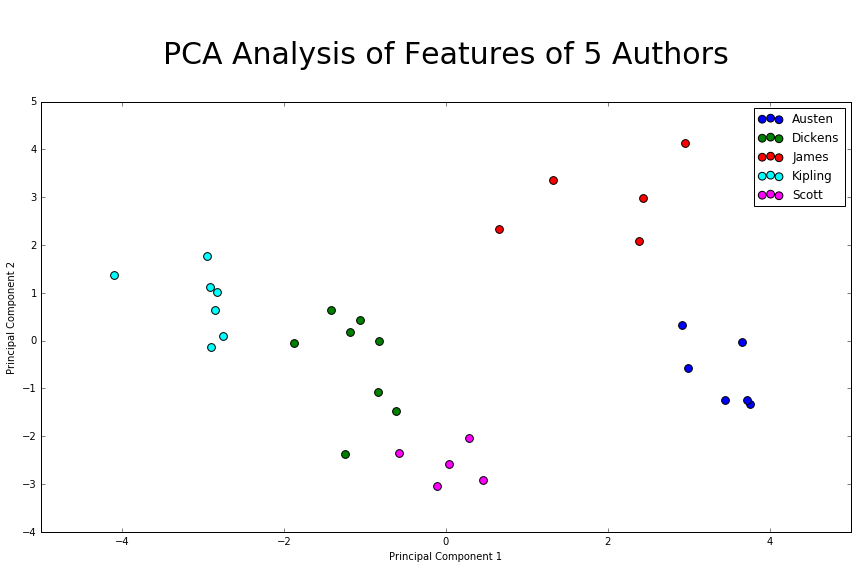

In [9]:
# Visualise data
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(12, 8))

    # Amend this so a random but unique colour is selected for each author
    for lab, col in zip(markers, ('blue', 'green', 'red', 'cyan', 'magenta')):

        plt.scatter(Y_sklearn[y == lab, 0],
                    Y_sklearn[y == lab, 1],
                    label=lab,
                    c=col,
                    s=60)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.title('\nPCA Analysis of Features of 5 Authors\n', fontsize=30)
    plt.tight_layout()
    plt.show()